In [16]:
from google.colab import drive
drive.mount('/content/drive')
####

Mounted at /content/drive


In [17]:
import pandas as pd


# If the file is in Google Drive
df = pd.read_csv('/content/drive/My Drive/Quantum_Machine_Learning/QSVC_miRNA/miRNA_Normal_Primary_MLtags_4_miRNA.csv')
df


,miRNA,has_miR_3065_5p,has_miR_19a_3p,has_miR_3130_5p,has_miR_101_3p,Class Labels
0,TCGA.CZ.5451.11,2060.405693,7.152621,3.269721,7511.630691,0
1,TCGA.CJ.5672.11,1826.011447,13.261193,4.059617,6618.949255,0
2,TCGA.CZ.5470.11,2918.552072,8.150330,5.361945,5766.551498,0
3,TCGA.A3.3358.11,648.011074,5.462689,4.588926,13314.206260,0
4,TCGA.B0.5701.11,2257.387167,10.114936,2.790362,5395.109485,0
...,...,...,...,...,...,...
237,TCGA.CZ.5465.01,2408.364518,28.450269,0.431076,19534.523600,1
238,TCGA.B0.5400.01,1689.485020,11.016231,4.005944,7774.524839,1
239,TCGA.CW.5583.01,809.210343,7.877221,0.358016,14662.628400,1
240,TCGA.B0.4818.01,1484.235647,17.843313,16.358213,10765.739840,1


In [3]:
pip install Qiskit

In [12]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,recall_score, f1_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import  cross_val_score


In [18]:
# Class label (0 = non metastasis(Negative), 1 = metastasis(Positive))

print("Number of data each class :")
print(df['Class Labels'].value_counts())

Number of data each class :
Class Labels
1    170
0     72
Name: count, dtype: int64


In [19]:
column_data = df.drop(['miRNA','Class Labels'], axis=1)
column_data

,has_miR_3065_5p,has_miR_19a_3p,has_miR_3130_5p,has_miR_101_3p
0,2060.405693,7.152621,3.269721,7511.630691
1,1826.011447,13.261193,4.059617,6618.949255
2,2918.552072,8.150330,5.361945,5766.551498
3,648.011074,5.462689,4.588926,13314.206260
4,2257.387167,10.114936,2.790362,5395.109485
...,...,...,...,...
237,2408.364518,28.450269,0.431076,19534.523600
238,1689.485020,11.016231,4.005944,7774.524839
239,809.210343,7.877221,0.358016,14662.628400
240,1484.235647,17.843313,16.358213,10765.739840


In [20]:
#take the values each column gene
features = column_data.values
print("Feature values each column :\n",features)

Feature values each column :
 [[2.06040569e+03 7.15262053e+00 3.26972068e+00 7.51163069e+03]
 [1.82601145e+03 1.32611925e+01 4.05961732e+00 6.61894926e+03]
 [2.91855207e+03 8.15032959e+00 5.36194499e+00 5.76655150e+03]
 [6.48011074e+02 5.46268907e+00 4.58892589e+00 1.33142063e+04]
 [2.25738717e+03 1.01149361e+01 2.79036223e+00 5.39510948e+03]
 [1.81221693e+03 2.22542444e+01 8.15951042e+00 8.71081726e+03]
 [3.18455015e+03 1.19499895e+01 2.75748794e+00 6.07372858e+03]
 [2.67753170e+03 8.58559746e+00 6.05208152e+00 6.38227296e+03]
 [2.47408858e+03 1.09250655e+01 6.72295211e+00 9.34398445e+03]
 [2.29728742e+03 1.30771051e+01 5.94392379e+00 4.32616169e+03]
 [1.28396674e+03 8.20815985e+00 3.15691577e+00 1.00185765e+04]
 [2.13433185e+03 1.10356861e+01 7.22367263e+00 4.51705510e+03]
 [2.77568969e+03 8.27381823e+00 1.12285096e+01 5.20717122e+03]
 [3.07158681e+03 1.15806909e+01 1.42530461e+01 6.26993074e+03]
 [1.37791566e+03 1.05668002e+01 2.81786213e+00 9.59317849e+03]
 [2.43908335e+03 5.450570

In [21]:
# X is 4 features and y is Class label (0 = non metastasis(Negative), 1 = metastasis(Positive))

X =column_data.values
y = df['Class Labels'].values

#if you use random_state=some_number(0,42,82),
#then we can guarantee that the spliting data output of Run 1 will be equal to the output of Run 2

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3,train_size=2/3,random_state=42)

print("X Training set :",X_train.shape)
print("y Training set :",y_train.shape)
print("X Test set :",X_test.shape)
print("y Test set :",y_test.shape)

print("X_train value :",X_train)
print("Y_train value :",y_train)
print("X_test value :",X_test)
print("Y_test value :",y_test)

X Training set : (161, 4)
y Training set : (161,)
X Test set : (81, 4)
y Test set : (81,)
X_train value : [[1.89787669e+03 3.49417350e+01 3.91869195e+00 1.26735741e+04]
 [2.21181421e+03 3.90598773e+00 3.90604008e+00 7.07699087e+03]
 [2.07656379e+03 2.16938470e+01 5.04503957e+00 7.73601181e+03]
 [8.09023268e+02 1.40823166e+01 3.52058434e+00 3.54634172e+03]
 [1.38187691e+03 1.01692086e+01 2.25977274e+00 9.52111044e+03]
 [1.61982129e+03 1.22819750e+01 2.78088081e+00 9.91576501e+03]
 [2.77568969e+03 8.27381823e+00 1.12285096e+01 5.20717122e+03]
 [3.38586034e+03 9.20497448e+00 7.28745085e+00 3.42458656e+03]
 [2.14291352e+03 1.74745207e+01 6.65670159e+00 8.46924056e+03]
 [2.44892336e+03 1.49602947e+01 6.36591896e+00 6.84080614e+03]
 [1.12878758e+03 8.30009951e+01 8.29944634e-01 3.97119597e+03]
 [4.77299942e+02 2.20158217e+01 6.16438045e+00 8.23434770e+03]
 [1.55791203e+03 1.89676458e+01 7.43831128e+00 9.73428723e+03]
 [1.76314089e+03 1.71599340e+01 3.62539305e+00 1.19721913e+04]
 [5.28735490

In [22]:

n_feat = 4
n_train = y_train.shape
n_test = y_test.shape

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:

n_features = X_train.shape[1]
g_scale = 1 / (n_features * X_train.var())

param_grid = {'C': [1,20,40,60, 80, 100, 120, 140,160,180,200,210,215,220,225,230,235,240,260],
              'gamma': [g_scale*1/2,g_scale*1/4,g_scale,(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4)],
             'kernel': ['rbf']}
from sklearn.svm import SVC

#param_grid = {'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'kernel': ['rbf']}

#this code for print 'recall','f1','accuracy', set refit=false
#grid = GridSearchCV(SVC(), param_grid,scoring=['recall','f1','accuracy'], refit = False, verbose = 3)

#this code for search the best parameters
#set refit=true to outomatic select the best parameter and set to svm model
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5,scoring='f1')


# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits
[CV 1/5] END C=1, gamma=2.6212290495909354, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, gamma=2.6212290495909354, kernel=rbf;, score=0.898 total time=   0.0s
[CV 3/5] END C=1, gamma=2.6212290495909354, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END C=1, gamma=2.6212290495909354, kernel=rbf;, score=0.844 total time=   0.0s
[CV 5/5] END C=1, gamma=2.6212290495909354, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END C=1, gamma=1.3106145247954677, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, gamma=1.3106145247954677, kernel=rbf;, score=0.898 total time=   0.0s
[CV 3/5] END C=1, gamma=1.3106145247954677, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, gamma=1.3106145247954677, kernel=rbf;, score=0.809 total time=   0.0s
[CV 5/5] END C=1, gamma=1.3106145247954677, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END C=1, gamma=5.242458099181871, kernel=rbf;, s

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
                               210, 215, 220, 225, 230, 235, 240, 260],
                         'gamma': [2.6212290495909354, 1.3106145247954677,
                                   5.242458099181871, 2.5e-05, 5e-05, 0.0001,
                                   0.0002, 0.0004],
                         'kernel': ['rbf']},
             scoring='f1', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 160, 'gamma': 1.3106145247954677, 'kernel': 'rbf'}
SVC(C=160, gamma=1.3106145247954677)


In [ ]:
#grid_predictions = grid.predict(X_test)
grid_predictions = grid.predict(X_test)

In [ ]:
# classification report
print("SVM Classification result after hyperparameter tunning :\n")
print(classification_report(y_test, grid_predictions))

print("F1 score:",f1_score(y_test, grid_predictions))
print("Recall score:",recall_score(y_test, grid_predictions))
print("Accuracy score:",accuracy_score(y_test, grid_predictions))

SVM Classification result after hyperparameter tunning :

              precision    recall  f1-score   support

           0       0.52      0.77      0.62        22
           1       0.90      0.73      0.80        59

    accuracy                           0.74        81
   macro avg       0.71      0.75      0.71        81
weighted avg       0.79      0.74      0.75        81

F1 score: 0.8037383177570093
Recall score: 0.7288135593220338
Accuracy score: 0.7407407407407407


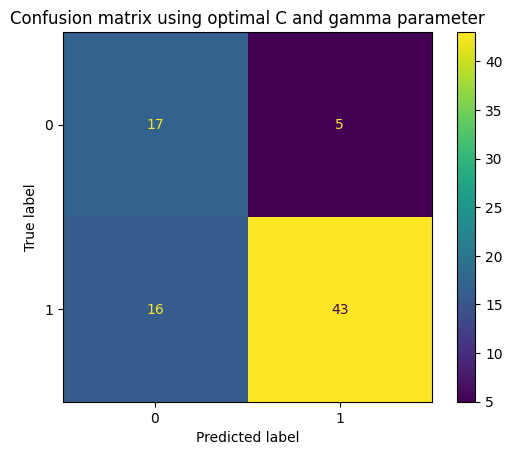

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
plt.title("Confusion matrix using optimal C and gamma parameter")
plt.show()

In [4]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 883.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512612 sha256=9deb3e016c5e2398ec9c0f51acb649280fa1172b9bb4e80ce4cf03530831fc33
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [5]:
pip install qiskit-algorithms

In [ ]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

fidelity = ComputeUncompute(sampler=Sampler())

In [ ]:
#create a new quantum kernel with the fidelity instance.
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = ZZFeatureMap(n_feat)
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=new_kernel)
qsvc.fit(X_train, y_train)
qsvc.score(X_test, y_test)

0.8024691358024691

In [ ]:
# Define the original RBF kernel function
from functools import reduce

# Define the data mapping function using the original RBF kernel equation
#the data map function has 2 parameter input which is x and gamma. x is the input dataset and gamma is the value for rbf kernel
#the logic meaning is if the length of dataset=1 then set coeff to the value of data if more than 1 then do calculation
#reduce is use to sum all result of calculation
#lamdda is used to multiplied the value of dataset gamma
def data_map_eq10_ori(x, gamma):
    coeff = x[0] if len(x) == 1 else reduce(lambda m, n: np.exp(-gamma*((m - n)*(m - n))), x)
    return coeff

In [ ]:
from sklearn.model_selection import StratifiedKFold
splits=3
skf = StratifiedKFold(n_splits=splits)
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
n_features = X_train.shape[1]
g_scale = 1 / (n_features * X_train.var())
g_scale

5.242458099181871

In [ ]:
#QSVC WITH HYPERPARAMETER TUNNING
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
n_features = X_train.shape[1]
g_scale = 1 / (n_features * X_train.var())

#gamma_values =[g_scale,g_scale+10,g_scale+20,g_scale+30]
#C_values = [ 0.1,1,2,3,4]

gamma_values =[g_scale,g_scale+10]
C_values = [ 1,2,3]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):
    data_map_func_rbf = lambda x: data_map_eq10_ori(x, gamma_val)
    rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
    new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)

  #  print(lambda x: data_map_eq10_ori(x, gamma))
#qsvc = QSVC(quantum_kernel=previous_kernel, C=1, gamma=gamma)
    qsvc = QSVC(quantum_kernel=new_kernel, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

# Train the QSVC classifier
        qsvc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = qsvc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")

Fold 0:
gamma: 5.242458099181871 C: 1 F1: [0.868421052631579]
Fold 1:
gamma: 5.242458099181871 C: 1 F1: [0.868421052631579, 0.88]
Fold 2:
gamma: 5.242458099181871 C: 1 F1: [0.868421052631579, 0.88, 0.860759493670886]
Fold 0:
gamma: 5.242458099181871 C: 2 F1: [0.8947368421052632]
Fold 1:
gamma: 5.242458099181871 C: 2 F1: [0.8947368421052632, 0.8493150684931507]
Fold 2:
gamma: 5.242458099181871 C: 2 F1: [0.8947368421052632, 0.8493150684931507, 0.8717948717948718]
Fold 0:
gamma: 5.242458099181871 C: 3 F1: [0.88]
Fold 1:
gamma: 5.242458099181871 C: 3 F1: [0.88, 0.8493150684931507]
Fold 2:
gamma: 5.242458099181871 C: 3 F1: [0.88, 0.8493150684931507, 0.8571428571428571]
Fold 0:
gamma: 15.24245809918187 C: 1 F1: [0.88]
Fold 1:
gamma: 15.24245809918187 C: 1 F1: [0.88, 0.8533333333333334]
Fold 2:
gamma: 15.24245809918187 C: 1 F1: [0.88, 0.8533333333333334, 0.8717948717948718]
Fold 0:
gamma: 15.24245809918187 C: 2 F1: [0.88]
Fold 1:
gamma: 15.24245809918187 C: 2 F1: [0.88, 0.8648648648648649]
Fo

In [ ]:
data_map_func_rbf = lambda x: data_map_eq10_ori(x, best_gamma)
rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)

best_qsvc = QSVC(quantum_kernel=new_kernel, C=best_C)

# Train the QSVC classifier
best_qsvc.fit(X_train, y_train)

# Predict the labels for the test data
predicted_labels = best_qsvc.predict(X_test)

# Evaluate the classification accuracy
best_qsvc_score = best_qsvc.score(X_test, y_test)

print(f"QSVC classification test score: {best_qsvc_score}")

QSVC classification test score: 0.8765432098765432


# **NN+QSVM**

In [6]:
from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

In [7]:
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

In [8]:
pip install tensorflow

In [9]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.7 MB/s eta 0:00:00


In [1]:
pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 15.8 MB/s eta 0:00:00
    

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler as QiskitSampler
from qiskit_aer.noise import NoiseModel

from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session, Sampler

In [24]:
X_train= X_train
Y_train= y_train
X_test= X_test
Y_test= y_test

In [25]:
def new_data(batch_size, X, Y):
    X1_new, X2_new, Y_new = [], [], []
    for i in range(batch_size):
        n, m = np.random.randint(len(X)), np.random.randint(len(X))
        X1_new.append(X[n])
        X2_new.append(X[m])
        if Y[n] == Y[m]:
            Y_new.append(1)
        else:
            Y_new.append(0)
    X1_new, X2_new, Y_new = torch.tensor(X1_new).to(torch.float32), torch.tensor(X2_new).to(torch.float32), torch.tensor(Y_new).to(torch.float32)
    return X1_new, X2_new, Y_new

X1_new_valid, X2_new_valid, Y_new_valid = new_data(10, X_test, Y_test)

In [28]:
pip install pennylane==0.27.0

  Using cached PennyLane-0.27.0-py3-none-any.whl (1.1 MB)
  Using cached retworkx-0.14.2-py3-none-any.whl (10 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached autoray-0.6.12-py3-none-any.whl (50 kB)
  Using cached PennyLane_Lightning-0.36.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.1 MB)
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
  Using cached PennyLane_Lightning-0.35.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.5 MB)
  Using cached PennyLane_Lightning-0.35.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.5 MB)
  Using cached PennyLane_Lightning-0.34.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.1 MB)
  Using cached PennyLane_Lightning-0.33.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14

In [29]:
import pennylane as qml
from pennylane import numpy as np

N_layers = 3

# exp(ixZ) gate
def exp_Z(x, wires, inverse=False):
    if inverse == False:
        qml.RZ(-2 * x, wires=wires)
    elif inverse == True:
        qml.RZ(2 * x, wires=wires)

# exp(i(pi - x1)(pi - x2)ZZ) gate
def exp_ZZ2(x1, x2, wires, inverse=False):
    if inverse == False:
        qml.CNOT(wires=wires)
        qml.RZ(-2 * (np.pi - x1) * (np.pi - x2), wires=wires[1])
        qml.CNOT(wires=wires)
    elif inverse == True:
        qml.CNOT(wires=wires)
        qml.RZ(2 * (np.pi - x1) * (np.pi - x2), wires=wires[1])
        qml.CNOT(wires=wires)


# Quantum Embedding 1 for model 1 (Conventional ZZ feature embedding)
def QuantumEmbedding1(input):
    for i in range(N_layers):
        for j in range(n_feat):
            qml.Hadamard(wires=j)
            exp_Z(input[j], wires=j)
        for k in range(n_feat-1):
            exp_ZZ2(input[k], input[k+1], wires=[k,k+1])
        exp_ZZ2(input[n_feat-1], input[0], wires=[n_feat-1, 0])

def QuantumEmbedding1_inverse(input):
    for i in range(N_layers):
        exp_ZZ2(input[n_feat-1], input[0], wires=[n_feat-1, 0], inverse=True)
        for k in reversed(range(n_feat-1)):
            exp_ZZ2(input[k], input[k+1], wires=[k,k+1], inverse=True)
        qml.Barrier()
        for j in range(n_feat):
            exp_Z(input[j], wires=j, inverse=True)
            qml.Hadamard(wires=j)

dev = qml.device('default.qubit', wires=n_feat)

@qml.qnode(dev, interface="torch")
def circuit1(inputs):
    QuantumEmbedding1(inputs[0:n_feat])
    QuantumEmbedding1_inverse(inputs[n_feat:2 * n_feat])
    return qml.probs(wires=range(n_feat))
#inputs = np.random.random(2 * n_feat)
#fig, ax = qml.draw_mpl(circuit1)(inputs)
#plt.show()

In [ ]:
from torch import nn
class Model1_Fidelity(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qlayer1 = qml.qnn.TorchLayer(circuit1, weight_shapes={})
        self.linear_relu_stack1 = nn.Sequential(
            nn.Linear(n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, n_feat)
        )
    def forward(self, x1, x2):
        x1 = self.linear_relu_stack1(x1)
        x2 = self.linear_relu_stack1(x2)
        x = torch.concat([x1, x2], 1)
        x = self.qlayer1(x)
        return x[:,0]

model = Model1_Fidelity()

In [ ]:
# Define model, optimizer, and loss function
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)
train_loss=[]
# Start training

loss_list = []  # Store loss history
model.train()  # Set model to training mode

iterations = 1000
for it in range(iterations):
    X1_batch, X2_batch, Y_batch = new_data(10, X_train, Y_train)
    pred = model(X1_batch, X2_batch)
    loss = loss_fn(pred, Y_batch)
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()

    if it % 10 == 0:
        print(f"Iterations: {it} Loss: {loss.item()}")
        with torch.no_grad():
            pred_validation = model(X1_new_valid, X2_new_valid)
            loss_validation = loss_fn(pred_validation, Y_new_valid)
            print(f"Validation Loss: {loss_validation}")

Iterations: 0 Loss: 0.4966866374015808
Validation Loss: 0.291958749294281
Iterations: 10 Loss: 0.19446344673633575
Validation Loss: 0.2901240289211273
Iterations: 20 Loss: 0.5841504335403442
Validation Loss: 0.2870665192604065
Iterations: 30 Loss: 0.5874969959259033
Validation Loss: 0.28281962871551514
Iterations: 40 Loss: 0.19415324926376343
Validation Loss: 0.2790045738220215
Iterations: 50 Loss: 0.3674660325050354
Validation Loss: 0.27195799350738525
Iterations: 60 Loss: 0.3072742521762848
Validation Loss: 0.27305132150650024
Iterations: 70 Loss: 0.18408140540122986
Validation Loss: 0.26060178875923157
Iterations: 80 Loss: 0.3982939124107361
Validation Loss: 0.26040118932724
Iterations: 90 Loss: 0.4694121479988098
Validation Loss: 0.25976821780204773
Iterations: 100 Loss: 0.48684653639793396
Validation Loss: 0.24374887347221375
Iterations: 110 Loss: 0.7228213548660278
Validation Loss: 0.24269826710224152
Iterations: 120 Loss: 0.3300396800041199
Validation Loss: 0.23198172450065613
I

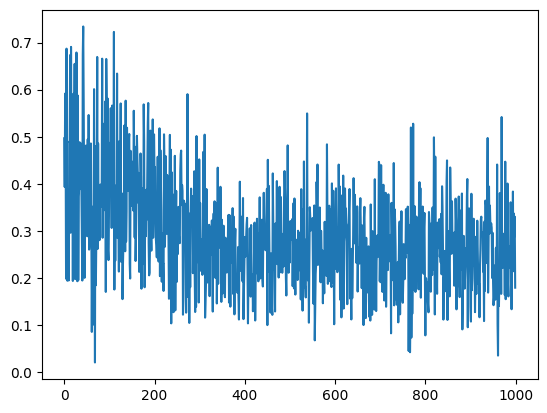

In [ ]:
plt.plot(train_loss)

In [ ]:
torch.save(model.state_dict(), 'Model1.pt')

In [ ]:
class x_transform(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack1 = nn.Sequential(
            nn.Linear(n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, n_feat)
        )
    def forward(self, x):
        x = self.linear_relu_stack1(x)
        return x

model = x_transform()

In [ ]:
model.load_state_dict(torch.load('Model1.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
X_train = torch.tensor(X_train).to(torch.float32)
X_test = torch.tensor(X_test).to(torch.float32)

In [ ]:
X_train = model(X_train)
X_test = model(X_test)

In [ ]:
X_train = X_train.detach().numpy()
X_test = X_test.detach().numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [ ]:
#QSVC WITH HYPERPARAMETER TUNNING
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
n_features = X_train.shape[1]
g_scale = 1 / (n_features * X_train.var())

gamma_values =[g_scale,g_scale+10,g_scale+20,g_scale+30]
C_values = [ 0.1,1,2,3,4]

#gamma_values =[g_scale,g_scale+10]
#C_values = [ 1,2,3]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):
    data_map_func_rbf = lambda x: data_map_eq10_ori(x, gamma_val)
    rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
    new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)

  #  print(lambda x: data_map_eq10_ori(x, gamma))
#qsvc = QSVC(quantum_kernel=previous_kernel, C=1, gamma=gamma)
    qsvc = QSVC(quantum_kernel=new_kernel, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

# Train the QSVC classifier
        qsvc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = qsvc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")

Fold 0:
gamma: 5.6409034710005495 C: 1 F1: [0.868421052631579]
Fold 1:
gamma: 5.6409034710005495 C: 1 F1: [0.868421052631579, 0.868421052631579]
Fold 2:
gamma: 5.6409034710005495 C: 1 F1: [0.868421052631579, 0.868421052631579, 0.8717948717948718]
Fold 0:
gamma: 5.6409034710005495 C: 2 F1: [0.868421052631579]
Fold 1:
gamma: 5.6409034710005495 C: 2 F1: [0.868421052631579, 0.8571428571428571]
Fold 2:
gamma: 5.6409034710005495 C: 2 F1: [0.868421052631579, 0.8571428571428571, 0.860759493670886]
Fold 0:
gamma: 5.6409034710005495 C: 3 F1: [0.868421052631579]
Fold 1:
gamma: 5.6409034710005495 C: 3 F1: [0.868421052631579, 0.8461538461538461]
Fold 2:
gamma: 5.6409034710005495 C: 3 F1: [0.868421052631579, 0.8461538461538461, 0.8395061728395061]
Fold 0:
gamma: 15.640903471000549 C: 1 F1: [0.868421052631579]
Fold 1:
gamma: 15.640903471000549 C: 1 F1: [0.868421052631579, 0.868421052631579]
Fold 2:
gamma: 15.640903471000549 C: 1 F1: [0.868421052631579, 0.868421052631579, 0.8888888888888891]
Fold 0:
g

In [ ]:
#QSVM+NN using best gamma and C by rbf kernel

gamma = best_gamma
data_map_func_rbf = lambda x: data_map_eq10_ori(x, gamma)
rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)


qsvc = QSVC(quantum_kernel=new_kernel, C=best_C)


# Train the QSVC classifier
qsvc.fit(X_train, Y_train)

# Predict the labels for the test data
predicted_labels = qsvc.predict(X_test)

# Evaluate the classification accuracy
qsvc_score = qsvc.score(X_test, Y_test)

print(f"QSVM+NN classification test score: {qsvc_score}")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM+NN result:\n")
print(classification_report(y_test, predicted_labels))
print("F1 :",f1_score(y_test, predicted_labels))

In [ ]:
ConfusionMatrixDisplay.from_estimator(qsvc, X_test, Y_test)
plt.title("QSVM+NN Confusion matrix using optimal C and gamma parameter")
plt.show()

In [ ]:
#SVC+NN
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]

gamma_values =[(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4),0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000,g_scale/10,g_scale/100,g_scale,g_scale+10,g_scale+20,g_scale+30,g_scale+40,g_scale+50]
C_values = [1,20,40,60,80,100,120,140,160,180,200,210,215,220,225,230,235,240,260]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):

    svc = SVC(kernel='rbf', gamma=gamma_val, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,Y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

# Train the QSVC classifier
        svc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = svc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")


In [ ]:
#SVM using best gamma and C by rbf kernel

svc = SVC(kernel='rbf', C=best_C,gamma=best_gamma)


# Train the QSVC classifier
svc.fit(X_train, Y_train)

# Predict the labels for the test data
predicted_labels = svc.predict(X_test)

# Evaluate the classification accuracy
svc_score =svc.score(X_test, Y_test)

print(f"QSVM+NN classification test score: {svc_score}")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM+NN result:\n")
print(classification_report(Y_test, predicted_labels))
print("F1 :",f1_score(Y_test, predicted_labels))

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test)
plt.title("QSVM+NN Confusion matrix using optimal C and gamma parameter")
plt.show()